# 881. Boats to Save People

### Difficulty: <font color = orange> Medium </font>

---

You are given an array `people` where `people[i]` is the weight of the `ith` person, and an infinite number of boats where each boat can carry a maximum weight of `limit`. Each boat carries at most two people at the same time, provided the sum of the weight of those people is at most `limit`.

Return the *minimum number of boats to carry every given person.*

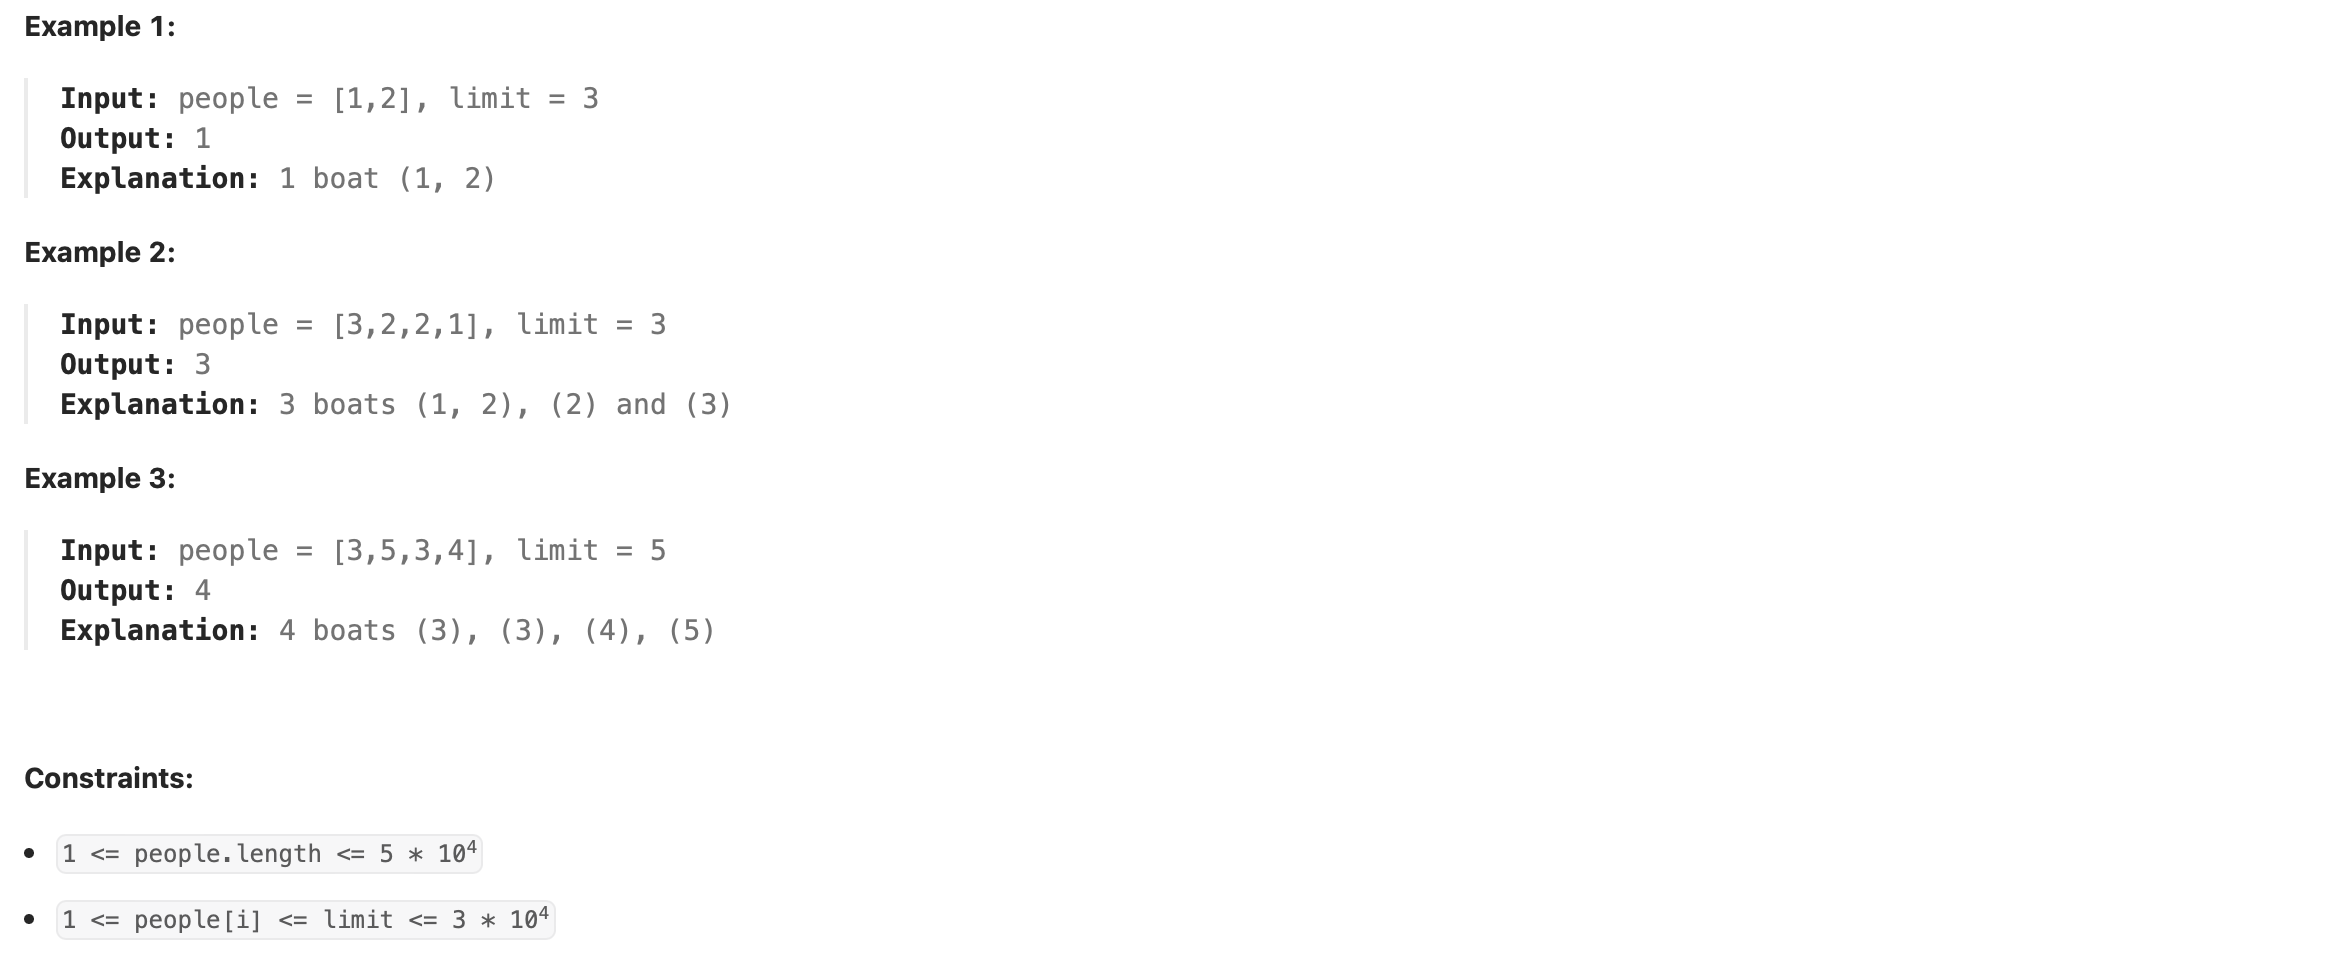

## Approach Overview:

Sort <b>people's</b> array and scan through it using two pointers. For each pointer pair, check whether BOTH the lightest AND heaviest weighted person can fit on the same one boat. If they can (i.e. if people[left] + people[right] <= limit), then move both pointers inwards (so we can look at the next weight pair).

If not then allocate a boat for only the heaviest person and then ONLY move (decrement) the right pointer so we can look at the next heaviest person. 

## Detailed Explanation:

This was a fairly straightforward algo. 

Initialize two pointers (one representing the lightest person and one for the heaviest person). 

I also need a variable to keep track of the number boat needed to rescue everyone.

Iterate through the weights of every person in the `people` array using a while loop.

`while left <= right:`

At each iteration we check if both the lightest and heaviest person can fit on the same boat (i.e. if people[left] + people[right] <= weight limit).

If true then move both pointers towards each other (move them inwards) so we can look at next lightest and heaviest weight pair. 

If not true, this means that `people[left] + people[right] > limit` (i.e both the lightest and heaviest person can NOT fit on the same boat). So only put the heaviest person on the boat (since only one person can fit, then put the heaviest). Now decrement right pointer so we can look at the next heaviest person. 


## Key Challenges:

Figuring the right boat allocation strategy was a challenge. I didn't realize that every single individual weight in `people` was always going less than or equal to limit. Because of that I was unnecessarily spending lots of time thinking of a solution to an impossible edge case. The case where the heaviest person weight was bigger than limit. Had I read the question carefully I would have realized that every single weight $<= limit$ . 

I need to think more logically and dry-run through a solution using the data I have and don't overthink it.

## Solution:

In [ ]:
class Solution:
    def numRescueBoats(self, people: List[int], limit: int) -> int:
        
        # sort people's array
        people = sorted(people)
        
        # initialize left pointer
        left = 0

        # initialize right pointer
        right = len(people) - 1
        
        # number of boats to carry people
        boats = 0

        # loop until pointers go out of bounds
        while left <= right:

            # check if sum of weight of current two people is less than or equal to the limit weight
            if people[left] + people[right] <= limit:

                # if it is, then allocate a boat to rescue both of them
                boats += 1

                # increment left pointer (move to the next lightest person)
                left += 1

                # decrement right pointer (move to the next heaviest person)
                right -= 1
            
            # check if the weight of heaviest person between the current two people is within the boat weight limit
            elif people[right] <= limit:

                # assign a boat to rescue the heaviest person
                boats += 1
                
                # decrement right pointer (move to the next heaviest person)
                right -= 1

        # return the minimum number of boats to carry every given person :)
        return boats